# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [83]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
import scipy.stats as st

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

### Generate the Cities List by Using the `citipy` Library

In [84]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 619


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [85]:
# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key 

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = url + "&q=" + city
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]


        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | poum
Processing Record 2 of Set 1 | micheweni
Processing Record 3 of Set 1 | tiksi
Processing Record 4 of Set 1 | ushuaia
Processing Record 5 of Set 1 | east london
Processing Record 6 of Set 1 | sinnamary
Processing Record 7 of Set 1 | kapaa
Processing Record 8 of Set 1 | bilaspur
Processing Record 9 of Set 1 | constitucion
Processing Record 10 of Set 1 | porbandar
Processing Record 11 of Set 1 | taolanaro
City not found. Skipping...
Processing Record 12 of Set 1 | nadym
Processing Record 13 of Set 1 | khonuu
City not found. Skipping...
Processing Record 14 of Set 1 | mancio lima
Processing Record 15 of Set 1 | rikitea
Processing Record 16 of Set 1 | husavik
Processing Record 17 of Set 1 | yar-sale
Processing Record 18 of Set 1 | souillac
Processing Record 19 of Set 1 | new norfolk
Processing Record 20 of Set 1 | hilo
Processing Record 21 of Set 1 | hobart
Processing Record 22 of Set 1 | haifa
P

Processing Record 40 of Set 4 | cayenne
Processing Record 41 of Set 4 | quesnel
Processing Record 42 of Set 4 | lagoa
Processing Record 43 of Set 4 | cockburn town
Processing Record 44 of Set 4 | abu kamal
Processing Record 45 of Set 4 | upernavik
Processing Record 46 of Set 4 | keti bandar
Processing Record 47 of Set 4 | lisakovsk
Processing Record 48 of Set 4 | nouadhibou
Processing Record 49 of Set 4 | paciran
Processing Record 0 of Set 5 | uvalde
Processing Record 1 of Set 5 | kizner
Processing Record 2 of Set 5 | touros
Processing Record 3 of Set 5 | port keats
Processing Record 4 of Set 5 | barentsburg
City not found. Skipping...
Processing Record 5 of Set 5 | boyolangu
Processing Record 6 of Set 5 | moscow
Processing Record 7 of Set 5 | lavrentiya
Processing Record 8 of Set 5 | nanortalik
Processing Record 9 of Set 5 | ixtapa
Processing Record 10 of Set 5 | georgetown
Processing Record 11 of Set 5 | saint-philippe
Processing Record 12 of Set 5 | bubaque
Processing Record 13 of S

Processing Record 26 of Set 8 | jiddah
City not found. Skipping...
Processing Record 27 of Set 8 | marshalltown
Processing Record 28 of Set 8 | ust-kulom
Processing Record 29 of Set 8 | boda
Processing Record 30 of Set 8 | victor harbor
Processing Record 31 of Set 8 | angoche
Processing Record 32 of Set 8 | alotau
City not found. Skipping...
Processing Record 33 of Set 8 | hovd
Processing Record 34 of Set 8 | yulara
Processing Record 35 of Set 8 | artyk
City not found. Skipping...
Processing Record 36 of Set 8 | fort nelson
Processing Record 37 of Set 8 | ust-uda
Processing Record 38 of Set 8 | puerto suarez
Processing Record 39 of Set 8 | shellbrook
Processing Record 40 of Set 8 | sistranda
Processing Record 41 of Set 8 | sataua
City not found. Skipping...
Processing Record 42 of Set 8 | tiarei
Processing Record 43 of Set 8 | samalaeulu
City not found. Skipping...
Processing Record 44 of Set 8 | aktau
Processing Record 45 of Set 8 | saleaula
City not found. Skipping...
Processing Reco

Processing Record 13 of Set 12 | moree
Processing Record 14 of Set 12 | samut sakhon
Processing Record 15 of Set 12 | sao bernardo
Processing Record 16 of Set 12 | mandera
Processing Record 17 of Set 12 | sept-iles
Processing Record 18 of Set 12 | ugoofaaru
Processing Record 19 of Set 12 | taoudenni
Processing Record 20 of Set 12 | matara
Processing Record 21 of Set 12 | santa cruz de la palma
Processing Record 22 of Set 12 | umm lajj
Processing Record 23 of Set 12 | novopokrovka
Processing Record 24 of Set 12 | meulaboh
Processing Record 25 of Set 12 | graaff-reinet
Processing Record 26 of Set 12 | makakilo city
Processing Record 27 of Set 12 | riyadh
Processing Record 28 of Set 12 | khandyga
Processing Record 29 of Set 12 | caravelas
Processing Record 30 of Set 12 | matay
Processing Record 31 of Set 12 | aketi
Processing Record 32 of Set 12 | westlock
Processing Record 33 of Set 12 | kudahuvadhoo
Processing Record 34 of Set 12 | paducah
Processing Record 35 of Set 12 | maniitsoq
Proc

In [86]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          568
Lat           568
Lng           568
Max Temp      568
Humidity      568
Cloudiness    568
Wind Speed    568
Country       568
Date          568
dtype: int64

In [89]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,poum,-20.2333,164.0167,80.42,79,21,17.58,NC,1669638573
1,micheweni,-4.9667,39.8333,83.26,67,36,2.84,TZ,1669638573
2,tiksi,71.6872,128.8694,-28.17,99,52,6.96,RU,1669638573
3,ushuaia,-54.8000,-68.3000,60.46,48,75,8.05,AR,1669638573
4,east london,-33.0153,27.9116,72.54,73,40,17.27,ZA,1669638573


In [90]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [91]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,poum,-20.2333,164.0167,80.42,79,21,17.58,NC,1669638573
1,micheweni,-4.9667,39.8333,83.26,67,36,2.84,TZ,1669638573
2,tiksi,71.6872,128.8694,-28.17,99,52,6.96,RU,1669638573
3,ushuaia,-54.8000,-68.3000,60.46,48,75,8.05,AR,1669638573
4,east london,-33.0153,27.9116,72.54,73,40,17.27,ZA,1669638573


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

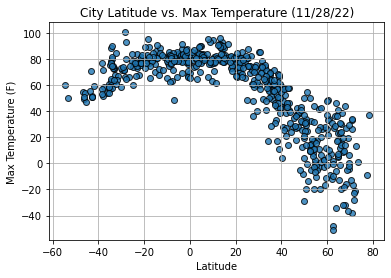

In [92]:
# Build scatter plot for latitude vs. temperature
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]

plt.scatter(lats, 
            max_temps,
            edgecolor="black", linewidths=1, marker="o", 
            alpha=0.8, label="Cities")

# Incorporate the other graph properties
plt.title("City Latitude vs. Max Temperature (%s)" % time.strftime("%x"))
plt.ylabel ("Max Temperature (F)")
plt.xlabel ("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

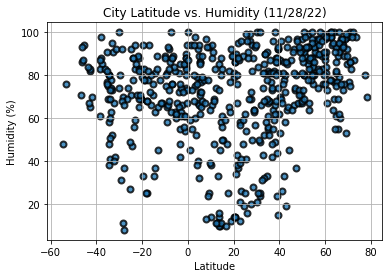

In [93]:
# Build the scatter plots for latitude vs. humidity
humidity = city_data_df["Humidity"]
plt.scatter(lats, 
            humidity,
            edgecolor="black", linewidths=2, marker="o", 
            alpha=0.8, label="Cities")

# Incorporate the other graph properties
plt.title("City Latitude vs. Humidity (%s)" % time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

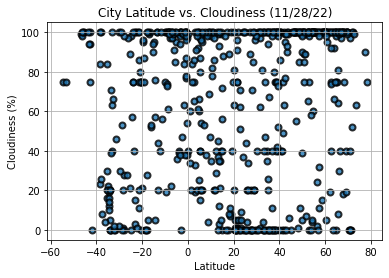

In [94]:
# Build the scatter plots for latitude vs. cloudiness
cloudiness = city_data_df["Cloudiness"]
plt.scatter(lats, 
            cloudiness,
            edgecolor="black", linewidths=2, marker="o", 
            alpha=0.8, label="Cities")

# Incorporate the other graph properties
plt.title("City Latitude vs. Cloudiness (%s)" % time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

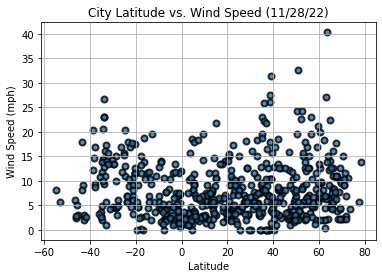

In [95]:
# Build the scatter plots for latitude vs. wind speed

wind_speed = city_data_df["Wind Speed"]
plt.scatter(lats, 
            wind_speed,
            edgecolor="black", linewidths=2, marker="o", 
            alpha=0.8, label="Cities")
# Incorporate the other graph properties

plt.title("City Latitude vs. Wind Speed (%s)" % time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [96]:
 # Define a function to create Linear Regression plots
def plot_linear_regression(x_values, y_values, title, text_coordinates):
    
    # Run regresson on southern hemisphere
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
    regress_values = x_values * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

    # Plot
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r-")
    plt.annotate(line_eq,text_coordinates,fontsize=15,color="red")
    plt.xlabel('Latitude')
    plt.ylabel(title)
    print(f"The r-squared is: {rvalue**2}")
    correlation = st.pearsonr(x_values,y_values)
    print(f"The correlation between both factors is {round(correlation[0],2)}")
   
    plt.show()


In [101]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
print(len(northern_hemi_df))
# Display sample data
northern_hemi_df.head()

398


,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
2,tiksi,71.6872,128.8694,-28.17,99,52,6.96,RU,1669638573
5,sinnamary,5.3833,-52.9500,78.46,86,97,9.55,GF,1669638573
6,kapaa,22.0752,-159.3190,71.58,95,100,10.36,US,1669638573
7,bilaspur,22.0833,82.1500,70.56,37,0,2.89,IN,1669638573
9,porbandar,21.6422,69.6093,81.07,43,1,10.96,IN,1669638574


In [102]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]
print(len(southern_hemi_df))
# Display sample data
southern_hemi_df.head()

170


,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,poum,-20.2333,164.0167,80.42,79,21,17.58,NC,1669638573
1,micheweni,-4.9667,39.8333,83.26,67,36,2.84,TZ,1669638573
3,ushuaia,-54.8000,-68.3000,60.46,48,75,8.05,AR,1669638573
4,east london,-33.0153,27.9116,72.54,73,40,17.27,ZA,1669638573
8,constitucion,-35.3333,-72.4167,61.11,77,16,2.91,CL,1669638574


###  Temperature vs. Latitude Linear Regression Plot

The r-squared is: 0.7403174653493895
The correlation between both factors is -0.86


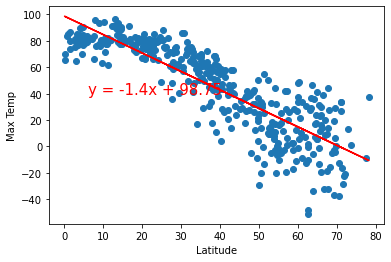

In [103]:
# Linear regression on Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
plot_linear_regression(x_values, y_values, 'Max Temp',(6,40))

The r-squared is: 0.34314795745373594
The correlation between both factors is 0.59


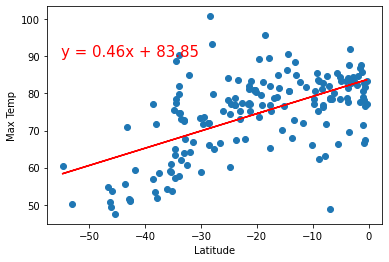

In [104]:
# Linear regression on Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
plot_linear_regression(x_values, y_values, 'Max Temp', (-55, 90))

**Discussion about the linear relationship:** 
The above graphs shows a linear regression done on the latitude of randomly selected citise locate in the Northern Hemisphere and the Southern Hemisphere compare to the maximum temperature of those citises. 

There is strong negative corelation between latitude and maximum temperature. As the latitude increase meximum temperature decrease. This make sensne as the citise located closer to  the equator have more sun and heat and weather is better than in the cities located far from  the equator.

There is a moderately strong positive correlation between maximum temperature and latitude in the southern hemisphere. as the distance to the equator decreases,  the maximum temperature increase. The Southern Hemisphere graph is a mirror image of  Northern Hemisphere graph. The correlation in The Southern Hemisphere is less strong than in the Northern Hemisphere, this can be cause by number of cities as in the Southern Hemisphere we have 170 cities and in the Northern Hemisphere 398 cities.   


### Humidity vs. Latitude Linear Regression Plot

The r-squared is: 0.16357526591511598
The correlation between both factors is 0.4


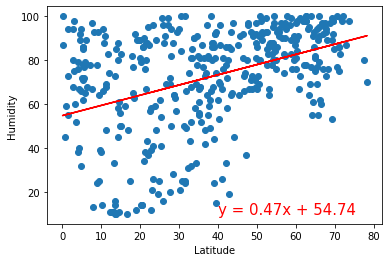

In [105]:
# Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
plot_linear_regression(x_values, y_values, 'Humidity',(40,10))

The r-squared is: 0.0007860334891780915
The correlation between both factors is 0.03


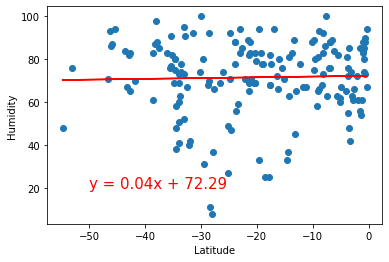

In [106]:
# Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
plot_linear_regression(x_values, y_values, 'Humidity', (-50, 20))

**Discussion about the linear relationship:** 
There is a weak-to-moderate positive correlation between latitude and humidity in the Northern Hemisphere. As latitude increases, humidity also increases. 

There is  a really weak positive correlation between latitude and humidity in the Southern Hemisphere.  

In both hemispheres, there is a lot of spread in humidity for each latitude. This can suggest that the relationship between humidity and latitude is more complex. There may be other factories affecting the humidity like for example : distance from the sea, season, altitude. 

### Cloudiness vs. Latitude Linear Regression Plot

The r-squared is: 0.05134840904779378
The correlation between both factors is 0.23


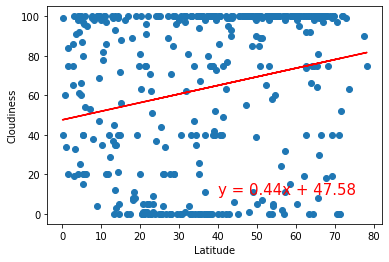

In [107]:
# Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
plot_linear_regression(x_values, y_values, 'Cloudiness', (40,10))

The r-squared is: 0.08758215755083126
The correlation between both factors is 0.3


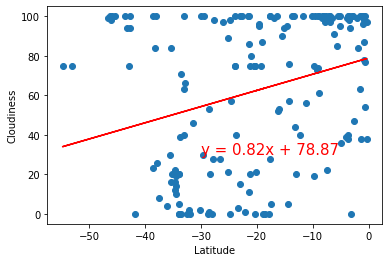

In [108]:
# Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
plot_linear_regression(x_values, y_values, 'Cloudiness', (-30,30))

**Discussion about the linear relationship:** 
The linear regression found a weak positive correlation between latitude and cloudiness. As latitude increases,  cloudiness increase in the northern hemisphere.  In the southern hemisphere, there is a weak-to-moderate positive correlation: as latitude increases, cloudiness increases too. 

### Wind Speed vs. Latitude Linear Regression Plot

The r-squared is: 0.02911376089006512
The correlation between both factors is 0.17


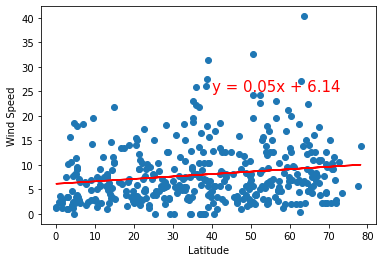

In [109]:
# Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
plot_linear_regression(x_values, y_values, 'Wind Speed', (40,25))

The r-squared is: 0.07896931051607127
The correlation between both factors is -0.28


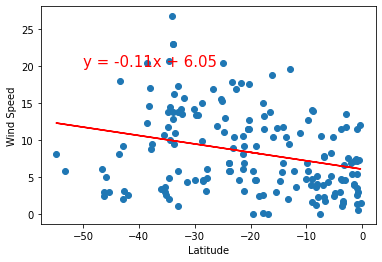

In [110]:
# Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
plot_linear_regression(x_values, y_values, 'Wind Speed', (-50, 20))

**Discussion about the linear relationship:**
The linear regression showed a  weak positive correlation between wind speed and latitude in the Northern Hemisphere. The Southern Hemisphere regression showed a negative correlation between .

Both correlations are weak, so this may suggest that there is no correlation, with potential outliers affecting the linear regression.